# Trabajo Práctico 1 - Cálculo de Ranking Page

## Enunciado

### Pregunta 1 - ¿Por que la matriz A definida en (4) es equivalente a $p \ \mathbf{W} \ \mathbf{D} + e \ z^t$ ? Justificar.

# Variables y Componentes

## Variables:


- **p**: Probabilidad que está entre 0 y 1 sin chocar lo extremos

- **W**: Es la matriz de conexión:
    - Si `w[i,j] = 1`, entonces `j` tiene un enlace hacia la página `i`.
    - Si `w[i,j] = 0`, entonces `j` NO tiene un enlace hacia la página `i`.
    - Si `i = j`, entonces `w[i,j] = 0`, es decir, toda su diagonal es 0 porque ignoramos autolinks.

\begin{bmatrix}
    0 & w_{1,2} & w_{1,3} & \cdots & w_{1,n} \\
    w_{2,1} & 0 & w_{2,3} & \cdots & w_{2,n} \\
    w_{3,1} & w_{3,2} & 0 & \cdots & w_{3,n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    w_{n,1} & w_{n,2} & w_{n,3} & \cdots & 0
\end{bmatrix}


- **D**: Es la matriz de importancia:
    - Se calcula a través de los grados, como el grado de la página `j`, que sería `c_j = sumatoria(i=1,n,w[i,j])`.
    - Representa la cantidad de enlaces salientes de `j`.
    - La matriz `D` se compone de `d[j,j]`:
        - Si `c_j != 0`, entonces `d[j,j]` = `1/c_j`.
        - En otro caso, `d[j,j]` = 0.
    - Es decir, la diagonal de `D` es pura 0 o 1/c_j, y las demás variables `d[i,j]` donde `i!=j` son 0.
 

\begin{bmatrix}
    d_{1,1} & 0 & 0 & \cdots & 0 \\
    0 & d_{2,2} & 0 & \cdots & 0 \\
    0 & 0 & d_{3,3} & \cdots & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \cdots & d_{n,n}
\end{bmatrix}


- **e**: Es un vector columna compuesto por 1


\begin{bmatrix}
    1 \\
    1 \\
    1 \\
    \vdots \\
    1
\end{bmatrix}


- **z transpuesta**: Es un vector columna que ahora es un vector fila y se compone de `z[j]`.
    - Si `c_j != 0` `z[j]` = `(1-p)/n`
    - otro caso `z[j] = 1/n`


\begin{bmatrix}
    z_1 & z_2 & \cdots & z_n
\end{bmatrix}




### Para empezar a entender como funciona la equivalencia 
Me fijare en como trabaja p*(W@D).


\begin{array}{c@{\hspace{0.5cm}}c@{\hspace{0.5cm}}c}
p &
\begin{bmatrix}
    0 & w_{1,2} & \cdots & w_{1,n} \\
    w_{2,1} & 0 & \cdots & w_{2,n} \\
    \vdots & \vdots & \ddots & \vdots \\
    w_{n,1} & w_{n,2} & \cdots & 0
\end{bmatrix}
&
\begin{bmatrix}
    d_{11} & 0 & \cdots & 0 \\
    0 & d_{22} & \cdots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \cdots & d_{nn}
\end{bmatrix}
\end{array}



- Si hago la multiplicacion de W@D podria hacerla de esta manera

- (W @ columna d1)|(w @ columnda d2)|...|(w @ columna dn)


aca dejo la de primera


\begin{array}{c@{\hspace{0.5cm}}c@{\hspace{0.5cm}}c}
\begin{bmatrix}
    0 & w_{12} & \cdots & w_{1n} \\
    w_{21} & 0 & \cdots & w_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    w_{n1} & w_{n2} & \cdots & 0
\end{bmatrix}
&
\begin{bmatrix}
    d_{11} \\
    0 \\
    \vdots \\
    0
\end{bmatrix}
\end{array}



\begin{bmatrix}
    0 \cdot d_{11} + w_{12} \cdot 0 + \cdots + w_{1n} \cdot 0 \\
    w_{21} \cdot d_{11} + 0 \cdot 0 + \cdots + w_{2n} \cdot 0 \\
    \vdots \\
    w_{n1} \cdot d_{11} + w_{n2} \cdot 0 + \cdots + 0 \cdot 0
\end{bmatrix}

\begin{bmatrix}
    0 \\
    w_{21} \cdot d_{11} \\
    \vdots \\
    w_{n1} \cdot d_{11}
\end{bmatrix}


- Repetimos con las demas columnas y multiplicando por p dando como resultado esta matriz


\begin{bmatrix}
    0 & p \cdot w_{1,2} \cdot d_{22} & \cdots & p \cdot w_{1,n} \cdot d_{nn} \\
    p \cdot w_{2,1} \cdot d_{11} & 0 & \cdots & p \cdot w_{2,n} \cdot d_{nn} \\
    \vdots & \vdots & \ddots & \vdots \\
    p \cdot w_{n,1} \cdot d_{11} & p \cdot w_{n,2} \cdot d_{22} & \cdots & 0
\end{bmatrix}
\]



- En e @ z transpuesta daria

 \begin{bmatrix}
    1 \cdot z_1 & 1 \cdot z_2 & \cdots & 1 \cdot z_n \\
    1 \cdot z_1 & 1 \cdot z_2 & \cdots & 1 \cdot z_n \\
    \vdots & \vdots & \ddots & \vdots \\
    1 \cdot z_1 & 1 \cdot z_2 & \cdots & 1 \cdot z_n
\end{bmatrix} 

Ahora para hacerlo mas facil  digo

**B = p * (W@D) + e @ z(t)**

1) cuando i = j
- B[1,1] = 0 + z1
- B[2,2] = 0 + z2
- ...
- B[n,n] = 0 + zn
con zn en ese caso valdra 1/n por que es cuando cj = 0 y es 0  porque es cuando j es igual i y los autolinks no  valen




2) cuando i != j
por ejemplo:
- B[2,1] = p * w[2,1] * d11 + z1
- B[3,1] = p * w[3,1] * d11 + z1
- B[1,2] = p * w[1,2] * d22 + z2


- aca puede haber dos casos
- si cj = 0:
   - osea si el djj = 0 implicando los wij que conformen a ese cj sean 0  
    - tambien haciendo que solo quede el zj que en este caso es 1/n


- si cj=!0
    - implicaria que aca wij pueda ser 1 o 0 (no lo se, solo se que el cj correspondiente jamas es 0) pero se que puede ser multplicado
    - por p y es multiplicado por 1/cj , osea p*wij/cj y eso se le suma (1-p)/n porque cj!=0 entonces daria
    - **p*wij/cj + (1-p)/n**
    
    
- Ahora si digo que B = A entonces A cumple todas las equivalencias

### Pregunta 2 -  ¿Cómo se garantiza existencia de la factorización $LU$? ¿ La matriz $(\mathbf{I} - p \ \mathbf{W} \ \mathbf{D})$ está bien condicionada? ¿Cómo influye el valor de $p$?

- Se puede garantizar la factorizacion LU de la matriz a resolver de la ecuacion (6) llendo por casos:

        Para entender a (I -p*(W@D))  primero seria bueno ver como esta compuesta p*(W@D)



\begin{bmatrix}
    0 & p \cdot w_{1,2} \cdot d_{22} & \cdots & p \cdot w_{1,n} \cdot d_{nn} \\
    p \cdot w_{2,1} \cdot d_{11} & 0 & \cdots & p \cdot w_{2,n} \cdot d_{nn} \\
    \vdots & \vdots & \ddots & \vdots \\
    p \cdot w_{n,1} \cdot d_{11} & p \cdot w_{n,2} \cdot d_{22} & \cdots & 0
\end{bmatrix}


- Las columnas siempre van a ser menores a 1:
    - todas comparte un p y un d[j,j] en comun
    - por ejemplo digo la suma de la columna 1 como:
    - p*[d11*(w[2,1]+...+w[n,1])]
      
      - si d11 = 0 entonces la cuenta es 0 menor a 1
     
      
      - si d11 != 0 entonces la cuenta es p*[(1/c1)*(w[2,1]+...+w[n,1]):
        
        -  cj es c1 en este caso entonces sumara todos los links que dio j = 1 que justo son (w[2,1]+...+w[n,1]) que es igual a c1
        - entonces en general es p * [(1/cj) * cj] = p con p menor siempre a 1
          




Se puede ver que la matriz (I-p (W@D) es EDD pero por columna(en el apunte solo dice por filas, entonces deberia ver una forma de saber
si es LU)

- Porque su diagonal es mayor a todas las sumatorias con modulo de sus columnas

1) Entonces tomare a (I-p (W@D)) = A
     
     - aplico A transpuesta, esta matriz seria EDD por filas cumpliendo el apunte, entonces es LU


$$
A^T = \begin{pmatrix}
1 & 0 & 0 & 0 \\
* & 1 & 0 & 0 \\
* & * & 1 & 0 \\
* & * & * & 1 \\
\end{pmatrix}
\begin{pmatrix}
* & * & * & * \\
0 & * & * & * \\
0 & 0 & * & * \\
0 & 0 & 0 & * \\
\end{pmatrix}
$$


Le aplico otra vez la transpuesta para volverla A


$$
(A^T)^\top = \left( \begin{pmatrix}
1 & 0 & 0 & 0 \\
* & 1 & 0 & 0 \\
* & * & 1 & 0 \\
* & * & * & 1 \\
\end{pmatrix}
\begin{pmatrix}
* & * & * & * \\
0 & * & * & * \\
0 & 0 & * & * \\
0 & 0 & 0 & * \\
\end{pmatrix} \right)^\top
$$

$$
= \begin{pmatrix}
* & 0 & 0 & 0 \\
* & * & 0 & 0 \\
* & * & * & 0 \\
* & * & * & * \\
\end{pmatrix}
\begin{pmatrix}
1 & * & * & * \\
0 & 1 & * & * \\
0 & 0 & 1 & * \\
0 & 0 & 0 & 1 \\
\end{pmatrix}
$$


Hay una descomposion de matrices triangularmente inferiores y superiores pero aun falta para decir que
mi L&#x0303;U&#x0303; de A = L&#x0303;U&#x0303; sea realmente descomposicion porque nuestra L&#x0303; debe tener 1s en la diagonal



entonces digo:
- A = U^t @ L^t (U y L originales)
- debido a que A^t = L @ U  son inversibles ya que A es EDD y por propiedades del apunte es inversible
- puedo decir:
  - A =  U^t @ Identidad @ L^t = U^t @ D @ D^-1 @ L^t  
  - A la Identidad la descompongo en 2 matrices diagonales que contengan la diagonal sola de a U y su inversa 

$$
D = \begin{pmatrix}
\frac{1}{u_{11}} & 0 & \cdots & 0 \\
0 & \frac{1}{u_{22}} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \frac{1}{u_{nn}}
\end{pmatrix}
$$


$$
D^{-1} = \begin{pmatrix}
U_{11} & 0 & \cdots & 0 \\
0 & U_{22} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & U_{nn}
\end{pmatrix}
$$


$$
U^T \cdot D = \begin{pmatrix}
u_{11} & 0 & 0 & \cdots & 0 \\
u_{21} & u_{22} & 0 & \cdots & 0 \\
u_{31} & u_{32} & u_{33} & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
u_{n1} & u_{n2} & u_{n3} & \cdots & u_{nn}
\end{pmatrix}
\cdot
\begin{pmatrix}
\frac{1}{u_{11}} & 0 & 0 & \cdots & 0 \\
0 & \frac{1}{u_{22}} & 0 & \cdots & 0 \\
0 & 0 & \frac{1}{u_{33}} & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & \frac{1}{u_{nn}}
\end{pmatrix}
$$


- Al U^T @ D lo llamare L_final

$$
\begin{pmatrix}
1 & 0 & \cdots  & 0 \\
\frac{u_{21}}{u_{11}} & 1 & 0 & \cdots & 0 \\
\frac{u_{31}}{u_{11}} & \frac{u_{32}}{u_{22}} & 1 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\frac{u_{n1}}{u_{11}} & \frac{u_{n2}}{u_{22}} & \cdots & \frac{u_{n,n-1}}{u_{n-1,n-1}} & 1
\end{pmatrix}
$$

- Me da una matriz triangular inferior
- si aplico D^-1 @ L^t   me va a dar una matriz triangular superior por que manejo la misma logica
- puedo decir U_final = D^-1 @ L^t y en este caso no me importa su diagonal solo que sea triangular superior

- Al final puedo decir:

$$
A = \begin{pmatrix}
1 & 0 & \cdots & 0 \\
\frac{u_{21}}{u_{11}} & 1 & 0 & \cdots & 0 \\
\frac{u_{31}}{u_{11}} & \frac{u_{32}}{u_{22}} & 1 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\frac{u_{n1}}{u_{11}} & \frac{u_{n2}}{u_{22}} & \cdots & \frac{u_{n,n-1}}{u_{n-1,n-1}} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
{*} & * & \cdots & * \\
0 & * & \cdots & * \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & *
\end{pmatrix}
$$


- Sabiendo que L_final y U_final son del mismo rango(lo menciono por como quedo el grafico) 

Se puede demuestrar que A tambien es una matriz que admite descomposicion LU 

**¿Esta bien condicionada?¿Como influye el valor de p?**

- Para averiguar que la matriz (I-p (W@D)) esta condicionada tenemos que ver que tan cerca o alejada del 1 este
- si es mas cercana a 1 esta mejor condicionada
- si no es lo contrario
- p influye en que tanto puede cambiar los resultados
- Tambien influye como este la matriz W @ D pero eso veremos en los siguientes ejemplos


\begin{bmatrix}
    1 & p \cdot w_{1,2} \cdot d_{22} & \cdots & p \cdot w_{1,n} \cdot d_{nn} \\
    p \cdot w_{2,1} \cdot d_{11} & 1 & \cdots & p \cdot w_{2,n} \cdot d_{nn} \\
    \vdots & \vdots & \ddots & \vdots \\
    p \cdot w_{n,1} \cdot d_{11} & p \cdot w_{n,2} \cdot d_{22} & \cdots & 1
\end{bmatrix}

- Para condicionar usaré la singularidad utilizando un B singular.
- Este B hará que A - B me quede solo con alguna columna de A.

En norma infinito:
- si p = 0.1:
    - La norma en infinito de A es 1 + 0.1 SUM(w[i,j] * d[j,j]) con i (estático) y j (que se mueve) entre 1 y n.
    - Respectivos para hacer la máxima de las sumas por fila a módulo.
    - La norma en infinito de A - B es 1.
    - ||A|| / ||A-B|| = 1 + 0.1 SUM(w[i,j] * d[j,j]).

- si p = 0.5:
    - La norma en infinito de A es 1 + 0.5 SUM(w[i,j] * d[j,j]) con i (estático) y j (que se mueve) entre 1 y n.
    - Respectivos para hacer la máxima de las sumas por fila a módulo.
    - La norma en infinito de A - B es 1.
    - ||A|| / ||A-B|| = 1 + 0.5 SUM(w[i,j] * d[j,j]).

- si p = 0.9:
    - La norma en infinito de A es 1 + 0.9 SUM(w[i,j] * d[j,j]) con i (estático) y j (que se mueve) entre 1 y n.
    - Respectivos para hacer la máxima de las sumas por fila a módulo.
    - La norma en infinito de A - B es 1.
    - ||A|| / ||A-B|| = 1 + 0.9 SUM(w[i,j] * d[j,j]).

- si p = 0.99:
    - La norma en infinito de A es 1 + 0.99 SUM(w[i,j] * d[j,j]) con i (estático) y j (que se mueve) entre 1 y n.
    - Respectivos para hacer la máxima de las sumas por fila a módulo.
    - La norma en infinito de A - B es 1.
    - ||A|| / ||A-B|| = 1 + 0.99 SUM(w[i,j] * d[j,j]).

- si p = 0.999:
    - La norma en infinito de A es 1 + 0.999 SUM(w[i,j] * d[j,j]) con i (estático) y j (que se mueve) entre 1 y n.
    - Respectivos para hacer la máxima de las sumas por fila a módulo.
    - La norma en infinito de A - B es 1.
    - ||A|| / ||A-B|| = 1 + 0.999 SUM(w[i,j] * d[j,j]).


En norma 1:
- si p = 0.1:
    - La norma en 1 de A es 1 + 0.1 SUM(w[i,j] * d[j,j]) con i (que se mueve) y j (estático) entre 1 y n.
    - Respectivos para hacer la máxima de las sumas por columnas a módulo.
    - 1 + 0.1 * 1 = 1 + 0.1 = 1.1 por lo visto en el ejercicio anterior.
    - La norma en 1 de A - B es 1 + 0.1 SUM(w[h,l] * d[l,l]) con h (que se mueve) y l (estático) entre 1 y n.
    - Respectivo para hacer la máxima de las sumas por columnas a módulo de A - B.
    - 1 + 0.1 * 1 = 1.1. tambien
    - ||A|| / ||A-B|| = 1.

- si p = 0.5:
    - Se aplica lo mismo.

- si p = 0.9:
    - Se aplica lo mismo.
 
- si p = 0.99:
    - Se aplica lo mismo.
 
- si p = 0.999:
    - Se aplica lo mismo.



- Ahora hare un B que cuando haga A-B me quede solo una fila de A

En norma infinito:
- si p = 0.1:
    - La norma en infinito de A es 1 + 0.1 SUM(w[i,j] * d[j,j]) con i (estático) y j (que se mueve) entre 1 y n.
    - Respectivos para hacer la máxima de las sumas por fila a módulo.
    - La norma en 1 de A - B es 1 + 0.1 SUM(w[h,l] * d[l,l]) con h (estatico) y l (que se mueve) entre 1 y n.
    - ||A|| / ||A-B|| = 1 + 0.1 SUM(w[i,j] * d[j,j]) /  1 + 0.1 SUM(w[h,l] * d[l,l])
    - Aca no puedo sacar mas informacion
    - lo mismo se aplicara con  p = 0.5, 0.9, 0.99, 0.999

En norma 1:
- si p = 0.1:
    - La norma en 1 de A es 1 + 0.1 SUM(w[i,j] * d[j,j]) con i (que se mueve) y j (estático) entre 1 y n.
    - Respectivos para hacer la máxima de las sumas por columnas a módulo.
    - 1 + 0.1 * 1 = 1 + 0.1 = 1.1 por lo visto en el ejercicio anterior.
    - La norma en 1 de A - B es 1
    - ||A|| / ||A-B|| = 1.1

- si p = 0.5:
    - La norma en 1 de A es 1 + 0.5 SUM(w[i,j] * d[j,j]) con i (que se mueve) y j (estático) entre 1 y n.
    - Respectivos para hacer la máxima de las sumas por columnas a módulo.
    - 1 + 0.5 * 1 = 1 + 0.5 = 1.5 por lo visto en el ejercicio anterior.
    - La norma en 1 de A - B es 1
    - ||A|| / ||A-B|| = 1.5

- si p = 0.9:
    - La norma en 1 de A es 1 + 0.9 SUM(w[i,j] * d[j,j]) con i (que se mueve) y j (estático) entre 1 y n.
    - Respectivos para hacer la máxima de las sumas por columnas a módulo.
    - 1 + 0.9 * 1 = 1 + 0.9 = 1.9 por lo visto en el ejercicio anterior.
    - La norma en 1 de A - B es 1
    - ||A|| / ||A-B|| = 1.9
 
- si p = 0.99:
    - La norma en 1 de A es 1 + 0.99 SUM(w[i,j] * d[j,j]) con i (que se mueve) y j (estático) entre 1 y n.
    - Respectivos para hacer la máxima de las sumas por columnas a módulo.
    - 1 + 0.99 * 1 = 1 + 0.99 = 1.99 por lo visto en el ejercicio anterior.
    - La norma en 1 de A - B es 1
    - ||A|| / ||A-B|| = 1.99

- si p = 0.999:
    - La norma en 1 de A es 1 + 0.999 SUM(w[i,j] * d[j,j]) con i (que se mueve) y j (estático) entre 1 y n.
    - Respectivos para hacer la máxima de las sumas por columnas a módulo.
    - 1 + 0.999 * 1 = 1 + 0.999 = 1.999 por lo visto en el ejercicio anterior.
    - La norma en 1 de A - B es 1
    - ||A|| / ||A-B|| = 1.999


En conclusión:
- el p influye en que tan bien condicionada este, si el p tiende a 1:
    -  en casi todos los casos va aumentar la condicion alejandose mas del 1 haciendo que este peor condicionada
    -  pero en otros caso no importa tanto

## Implementación

Implementar la factorización $LU$ para resolver el sistema de ecuaciones (6) que permite hallar la solución buscada (es decir, el ranking de páginas). Se podrá utilizar la función **scipy.linalg.solve_triangular** para resolver sistemas triangulares.

En el siguiente cuerpo de la notebook se genera un test que va a evaluar la función que resuelve el sistema a través de un test unitario. La resolución debe realizarse en el archivo **funciones.py** que acompaña el **template-alumnos**.

In [1]:
from funciones import *

### Test Unitario
En el archivo funciones.py hay que implementar la función que obtienen el ranking de las páginas.
Se espera que el llamado a la siguiente función arroje un valor esperado

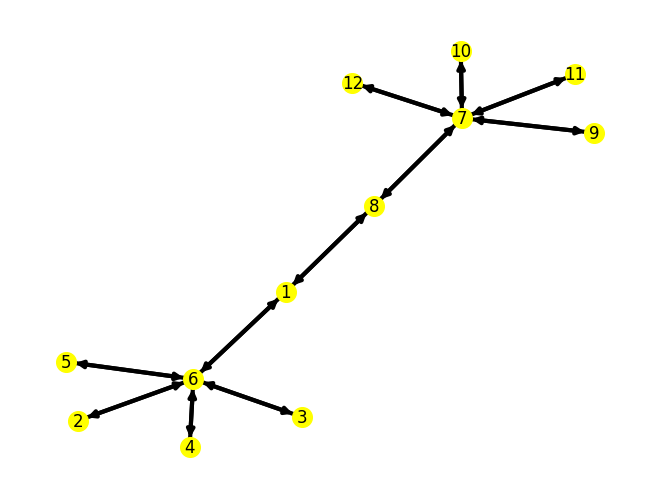

**************************************************
Test unitario 1
BIEN! - Paso correctamente el test unitario
**************************************************


In [2]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test unitario 1')
try:
    assert(np.isclose(obtenerMaximoRankingScore(W, p), 0.18115942))
except:
    print('OUCH!! - No paso el test unitario')
else:
    print('BIEN! - Paso correctamente el test unitario')
print('*'*50)

### Test Unitarios Adicionales

El grupo **deberá** proponer al menos 3 instancias de prueba no triviales, dos de las cuales deben ser de tipo TODOS LOS NODOS CONECTADOS, y otra de tipo NINGUNO CONECTADO. La tercera instancia queda a criterio del grupo.

Para el análisis, guiarse y responder las siguientes preguntas: 

* ¿Cómo es el ranking obtenido en cada caso de acuerdo a la estructura del grafo páginas? 
* ¿Qué conclusiones pueden sacar de la interpretación de los resultados?

Graficar los grafos usando las funciones en el **funciones.py**.

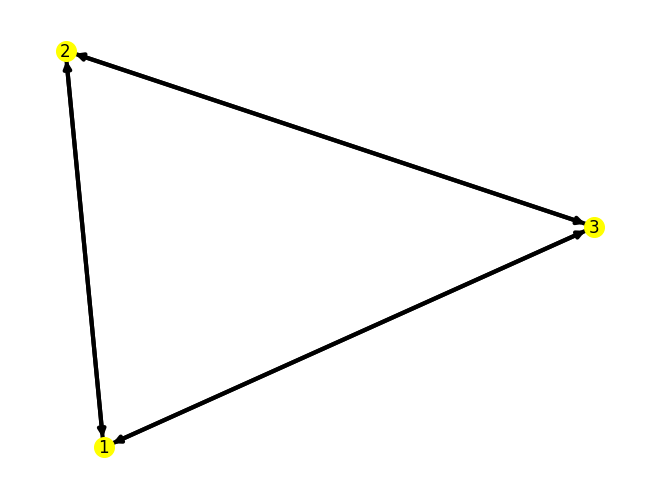

([3, 2, 1], array([[0.33333333],
       [0.33333333],
       [0.33333333]]))
([3, 2, 1], array([[0.33333333],
       [0.33333333],
       [0.33333333]]))
([2, 1, 3], array([[0.33333333],
       [0.33333333],
       [0.33333333]]))
([3, 2, 1], array([[0.33333333],
       [0.33333333],
       [0.33333333]]))


'Los rankings obtenidos son iguales, no hay diferencias de los flotantes cuando usamos diferentes casos de probabilidad. Esto se debe a que cuando armamos D para calcular ranking este estará compuesto por varios cj idénticos dejandonos estos rankings tan peculiares'

In [3]:
#Casos todos conectados
archivo_test = './tests/test_todos_unidos.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

#calculo diferentes p para entender mejor que es lo que pasa
p = [0.1, 0.25, 0.5, 0.75]

for i in p:
    print(calcularRanking(W,i))


"""Los rankings obtenidos son iguales, no hay diferencias de los flotantes cuando usamos diferentes casos de probabilidad. Esto se debe a que cuando armamos D para calcular ranking este estará compuesto por varios cj idénticos dejandonos estos rankings tan peculiares"""
 


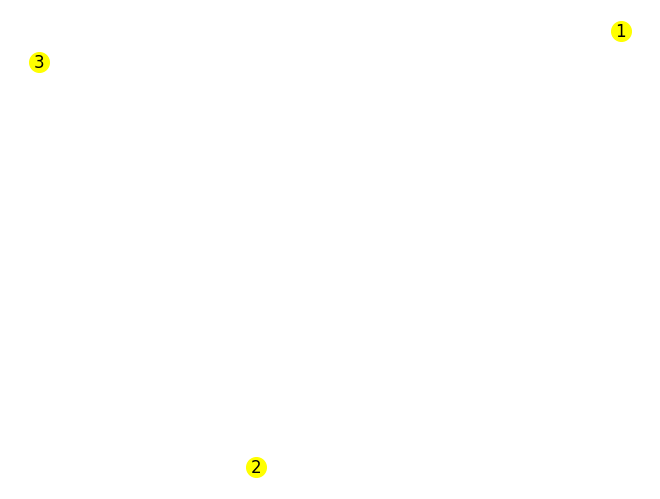

([3, 2, 1], array([[0.33333333],
       [0.33333333],
       [0.33333333]]))
([3, 2, 1], array([[0.33333333],
       [0.33333333],
       [0.33333333]]))
([3, 2, 1], array([[0.33333333],
       [0.33333333],
       [0.33333333]]))
([3, 2, 1], array([[0.33333333],
       [0.33333333],
       [0.33333333]]))


'Similar al caso de arriba pero sin ningun tipo de conexión entre los diferentes nodos. Los cj siguen siendo iguales y los rankings están conformados por triples empates.'

In [4]:
archivo_test = './tests/test_todos_desconectados.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

p = [0.1, 0.25, 0.5, 0.75]

for i in p:
    print(calcularRanking(W,i))
    
"""Similar al caso de arriba pero sin ningun tipo de conexión entre los diferentes nodos. Los cj siguen siendo iguales y los rankings están conformados por triples empates."""


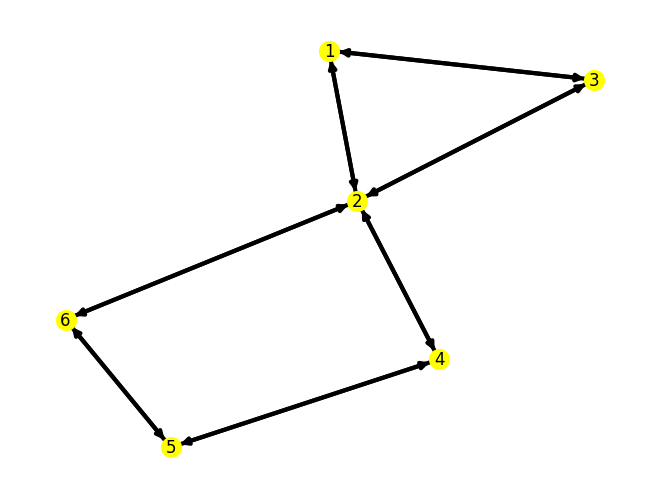

([5, 1, 6, 4, 2, 3], array([[0.16269889],
       [0.18255772],
       [0.16269889],
       [0.16287833],
       [0.16628783],
       [0.16287833]]))
([6, 1, 5, 4, 2, 3], array([[0.15742397],
       [0.2039356 ],
       [0.15742397],
       [0.15831843],
       [0.16457961],
       [0.15831843]]))
([6, 1, 5, 4, 2, 3], array([[0.15023474],
       [0.23474178],
       [0.15023474],
       [0.15258216],
       [0.15962441],
       [0.15258216]]))
([6, 1, 5, 3, 2, 4], array([[0.14509068],
       [0.26141338],
       [0.14509068],
       [0.14790494],
       [0.15259537],
       [0.14790494]]))


' Este grafo presenta 6 nodos, entre los cuales está el n° 2 que está conectado con otros 4 siendo el más importante. El resto de los nodos solo tiene 2 conexiones. El otro nodo destacable es el n° 5, que al no estar conectado con el n° 2 siempre es el segundo más importante. Los nodos n° 1 y 3 y los n° 4 y 6 van intercambiando posiciones en el ranking según va cambiando p '

In [5]:
archivo_test = './tests/test_especial.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

p = [0.1, 0.25, 0.5, 0.75]

for i in p:
    print(calcularRanking(W,i))

""" Este grafo presenta 6 nodos, entre los cuales está el n° 2 que está conectado con otros 4 siendo el más importante. El resto de los nodos solo tiene 2 conexiones. El otro nodo destacable es el n° 5, que al no estar conectado con el n° 2 siempre es el segundo más importante. Los nodos n° 1 y 3 y los n° 4 y 6 van intercambiando posiciones en el ranking según va cambiando p """


---

## Enunciado

Sobre los casos de test que se encuentran en el folder `tests`, se pide realizar los análisis siguientes para todos los grafos del folder.

### Análisis Cuantitativo

Para el análisis cuantitativo, se pide, como mínimo, estudiar los tiempos de procesamiento en función del tamaño del grafo de páginas y de la densidad del mismo. Para esto, se espera que presenten gráficos mostrando los tiempos de ejecución para obtener la solución en función de la cantidad de nodos/links de diferentes grafos de páginas aleatorios.


' se ven 4 gráficos con 2 p distintos. 2 son tiempo en función de nodos y 2 tiempo en función de links. Cuando hacemos el gráfico según los nodos vemos una curva clara que asciende exponencialmente. Vale la pena aclarar que esta curva no es perfecta porque la escala del gráfico es logarítmica.Cuando graficamos según los links vemos que se rompe totalmente la curva. Se pueden apreciar 2 tests que tomaron mucho más tiempo que otros que tienen muchos más links. La razón de que hayan tomado más tiempo es que tienen una mayor cantidad de nodos, con menos links. \nLas diferencias son muy marcadas: los tests con más links llegan a tener cerca de 180mil links y 500 nodos pero el tiempo de computo no llega ser ni de medio segundo. Por otro lado, los que más tiempo tardan tienen 12mil links pero 3000 nodos y tarda muchisimo más. Sabiendo eso, podemos concluir que lo que realmente importa para la densidad del grafo no es la cantidad de links sino casi que exclusivamente la cantidad de nodos'

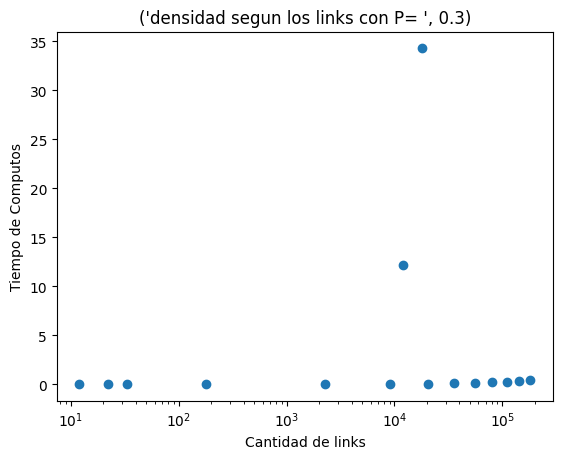

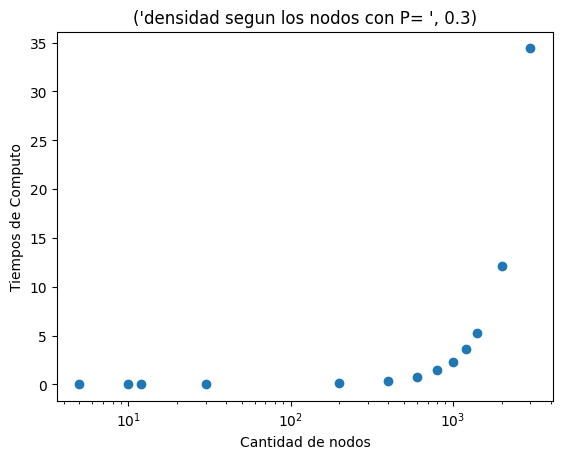

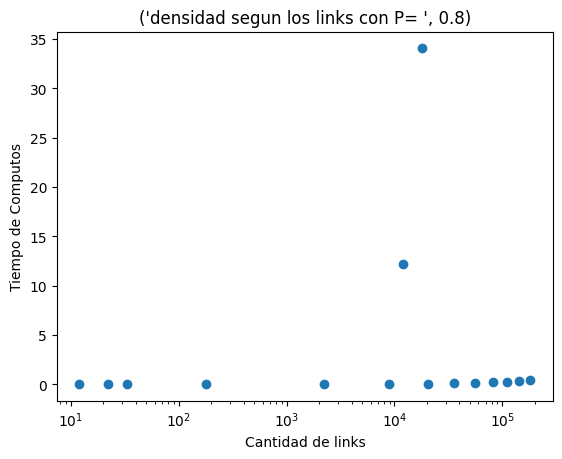

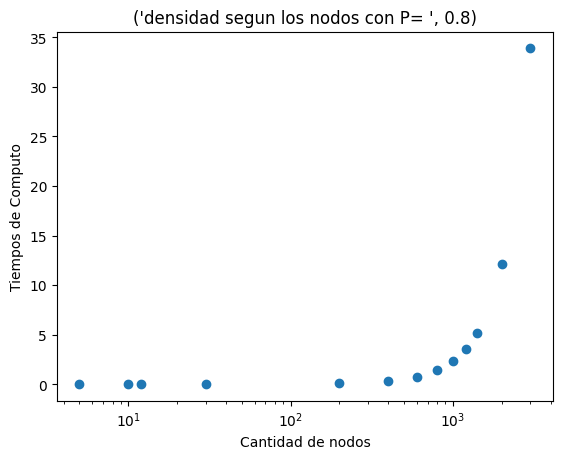

In [10]:
analisisCuantitativo()
""" se ven 4 gráficos con 2 p distintos. 2 son tiempo en función de nodos y 2 tiempo en función de links. Cuando hacemos el gráfico según los nodos vemos una curva clara que asciende exponencialmente. Vale la pena aclarar que esta curva no es perfecta porque la escala del gráfico es logarítmica.Cuando graficamos según los links vemos que se rompe totalmente la curva. Se pueden apreciar 2 tests que tomaron mucho más tiempo que otros que tienen muchos más links. La razón de que hayan tomado más tiempo es que tienen una mayor cantidad de nodos, con menos links. 
Las diferencias son muy marcadas: los tests con más links llegan a tener cerca de 180mil links y 500 nodos pero el tiempo de computo no llega ser ni de medio segundo. Por otro lado, los que más tiempo tardan tienen 12mil links pero 3000 nodos y tarda muchisimo más. Sabiendo eso, podemos concluir que lo que realmente importa para la densidad del grafo no es la cantidad de links sino casi que exclusivamente la cantidad de nodos"""

### Análisis Cualitativo

Para el análisis cualitativo se deberán estudiar los rankings obtenidos, en función de la estructura del grafo, y del valor de $p$. Para esto, se espera que presenten gráficos mostrando las probabilidades de las páginas mejor rankeadas en función del valor de $p$. 


'En el gráfico se puede ver como evolucionan los 3 primeros puestos en función de p. Cuando p es bajo los 3 tienen un puntaje bastante cercano, pero según p va incrementando la diferencia entre el primero y los otros dos también crece notablemente. Los puestos n°2 y n°3 pierden un poco de puntaje mientras que el n°1 aumenta casi 0.1 puntos. También resulta evidente que las funciones nunca se cruzan, es decir que el ranking se mantiene igual según va cambiando p.'

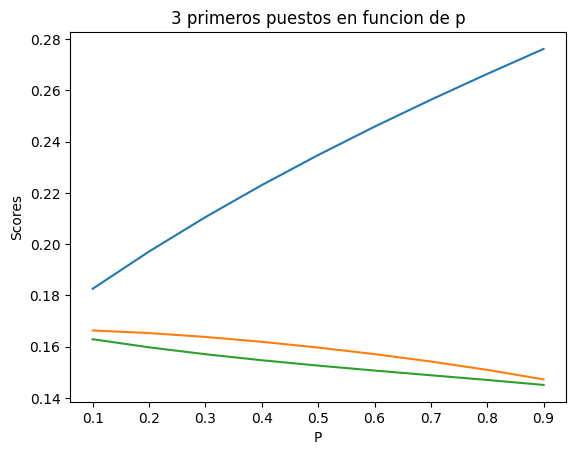

In [7]:
w = leer_archivo("./tests/test_especial.txt")
graficoCualitativo(w)
"""En el gráfico se puede ver como evolucionan los 3 primeros puestos en función de p. Cuando p es bajo los 3 tienen un puntaje bastante cercano, pero según p va incrementando la diferencia entre el primero y los otros dos también crece notablemente. Los puestos n°2 y n°3 pierden un poco de puntaje mientras que el n°1 aumenta casi 0.1 puntos. También resulta evidente que las funciones nunca se cruzan, es decir que el ranking se mantiene igual según va cambiando p."""


### Dos estrellas

Para el caso **test_dosestrellas.txt** se pregunta: 

¿Cuál es la mínima cantidad de links que se deben agregar para que la pagina correspondiente al nodo 1 quede primera en el ranking? ¿ Cómo se modificó la conectividad? Analizar.



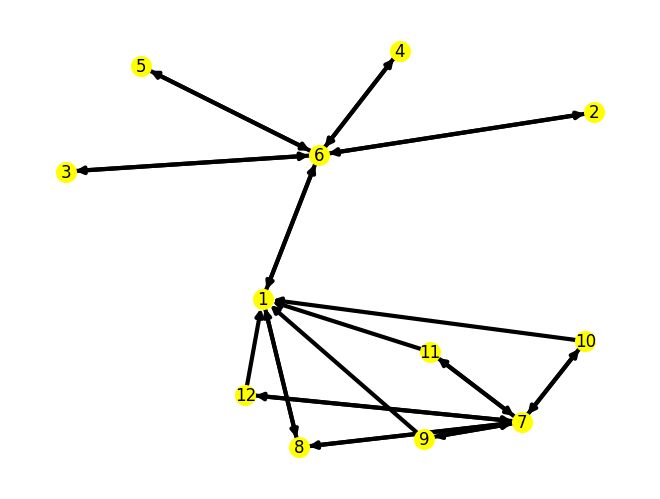

([1, 12, 11, 10, 9, 3, 2, 4, 7, 8, 6, 5], array([[0.17864088],
       [0.05362117],
       [0.05362117],
       [0.05362117],
       [0.05362117],
       [0.15977295],
       [0.16266358],
       [0.06879697],
       [0.05391023],
       [0.05391023],
       [0.05391023],
       [0.05391023]]))


'La minima cantidad de links que se pueden agregar para que 1 sea el más importante son 4. Elegimos los links (12 1 ,11 1 , 10 1, 9 1) los mas cercanos al 7, marcando una conectividad con tendencias al 1 muy cerrada. Además corroboramos con diferentes valores para p y la mínima cantidad de links sigue siendo 4. Para asegurarnos que 4 sea la mínima cantidad fuimos probando agregando menos links. Con 1 solo no hacía casi que ninguna diferencia. Con 2 links si hay un poco más de diferencia respecto al ranking de puntajes pero no llega a ser suficiente para alcanzar lo que buscamos. Agregando 3 links se acerca bastante siendo lo más eficiente agregar 3 de los links que esten conectados al nodo n°7, pero igualmente sigue sin alcanzar sin importar cuál sea la combinación de 3 links que agreguemos.'

In [8]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas_modificada.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)
p = 0.5

print(calcularRanking(W,p))



"""La mínima cantidad de links que se pueden agregar para que el nodo n°1 sea el más importante son 4. Elegimos los links 12 1 ,11 1 , 10 1, 9 1 (los mas cercanos al 7), marcando una conectividad con tendencias al 1 muy cerrada. Además corroboramos con diferentes valores para p y la mínima cantidad de links sigue siendo 4. Para asegurarnos que 4 sea la mínima cantidad fuimos probando agregando menos links. Con 1 solo no hacía casi que ninguna diferencia. Con 2 links si hay un poco más de diferencia respecto al ranking de puntajes pero no llega a ser suficiente para alcanzar lo que buscamos. Agregando 3 links se acerca bastante siendo lo más eficiente agregar 3 de los links que esten conectados al nodo n°7, pero igualmente sigue sin alcanzar sin importar cuál sea la combinación de 3 links que agreguemos."""